# Análise exploratória de dados

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Descrição dos dados

In [2]:
exercise = sns.load_dataset("exercise", index_col=0)
exercise.set_index("id", inplace=True)

In [3]:
exercise.head()

,diet,pulse,time,kind
id,,,,
1,low fat,85,1 min,rest
1,low fat,85,15 min,rest
1,low fat,88,30 min,rest
2,low fat,90,1 min,rest
2,low fat,92,15 min,rest


In [4]:
exercise.diet

id
1     low fat
1     low fat
1     low fat
2     low fat
2     low fat
       ...   
29     no fat
29     no fat
30     no fat
30     no fat
30     no fat
Name: diet, Length: 90, dtype: category
Categories (2, object): ['no fat', 'low fat']

In [5]:
exercise.mode()

,diet,pulse,time,kind
0,no fat,92,1 min,rest
1,low fat,97,15 min,walking
2,NaN,100,30 min,running


In [6]:
oiii = exercise['pulse'].mean()
exercise['pulse'].median()
exercise['pulse'].mode()

0     92
1     97
2    100
Name: pulse, dtype: int64

In [7]:
exercise.describe()

,pulse
count,90.000000
mean,99.700000
std,14.858471
min,80.000000
25%,90.250000
50%,96.000000
75%,103.000000
max,150.000000


In [8]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 1 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   diet    90 non-null     category
 1   pulse   90 non-null     int64   
 2   time    90 non-null     category
 3   kind    90 non-null     category
dtypes: category(3), int64(1)
memory usage: 2.0 KB


In [9]:
exercise.head()

,diet,pulse,time,kind
id,,,,
1,low fat,85,1 min,rest
1,low fat,85,15 min,rest
1,low fat,88,30 min,rest
2,low fat,90,1 min,rest
2,low fat,92,15 min,rest


In [14]:
exercise.describe(include="all")

,diet,pulse,time,kind
count,90,90.000000,90,90
unique,2,NaN,3,3
top,no fat,NaN,1 min,rest
freq,45,NaN,30,30
mean,NaN,99.700000,NaN,NaN
std,NaN,14.858471,NaN,NaN
min,NaN,80.000000,NaN,NaN
25%,NaN,90.250000,NaN,NaN
50%,NaN,96.000000,NaN,NaN
75%,NaN,103.000000,NaN,NaN


In [19]:
exercise.groupby('id')['pulse'].agg(['mean','median','std'])

,mean,median,std
id,,,
1,86.000000,85.0,1.732051
2,91.666667,92.0,1.527525
3,96.000000,97.0,1.732051
4,81.666667,82.0,1.527525
5,91.333333,91.0,0.577350
6,83.333333,83.0,0.577350
7,88.333333,88.0,1.527525
8,93.666667,94.0,1.527525
9,97.333333,97.0,1.527525


In [10]:
dicionario = pd.DataFrame([
    {
        "variavel": "id",
        "descricao": "Indivíduo",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "diet",
        "descricao": "Tipo de dieta",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "pulse",
        "descricao": "Batimentos cardíacos",
        "tipo":"quantitativa",
        "subtipo":"discreta",
    },{
        "variavel": "time",
        "descricao": "Tempo de exercício",
        "tipo":"quantitativa",
        "subtipo":"contínua",
    },{
        "variavel": "kind",
        "descricao": "Tipo de exercício",
        "tipo":"qualitativa",
        "subtipo":"nominal",
    }
])

dicionario

,variavel,descricao,tipo,subtipo
0,id,Indivíduo,qualitativa,nominal
1,diet,Tipo de dieta,qualitativa,nominal
2,pulse,Batimentos cardíacos,quantitativa,discreta
3,time,Tempo de exercício,quantitativa,contínua
4,kind,Tipo de exercício,qualitativa,nominal


In [11]:
qualitativas = dicionario[dicionario['tipo'] == 'qualitativa'].variavel.tolist()
quantitativas = dicionario[dicionario['tipo'] == 'quantitativa'].variavel.tolist()

## 2. Perguntas de partida e hipóteses

    2.1. Quantos valores são nulos?
    2.2. Qual é a distribuição dos tipos de dieta entre os indivíduos?
    2.3. Quais são os tipos mais comuns de exercício realizados pelas pessoas no estudo?
    2.4. Como os batimentos cardíacos (pulse) variam em relação ao tipo de dieta?
    2.5. Como os batimentos cardíacos (pulse) variam em relação ao tipo de exercício?
    2.6. Há alguma associação entre o tempo de exercício e os batimentos cardíacos?

### 2.1. Quantos valores são nulos?

In [13]:
number_of_na_by_column = exercise.isnull().sum()
number_of_na_rows = exercise.isnull().any(axis=1).sum()
print(number_of_na_by_column, number_of_na_rows)

diet     0
pulse    0
time     0
kind     0
dtype: int64 0


/tmp/ipykernel_1566/1901140498.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dadus = exercise.groupby('kind')['pulse'].agg(['mean','median','std'])


<Axes: xlabel='kind', ylabel='mean'>

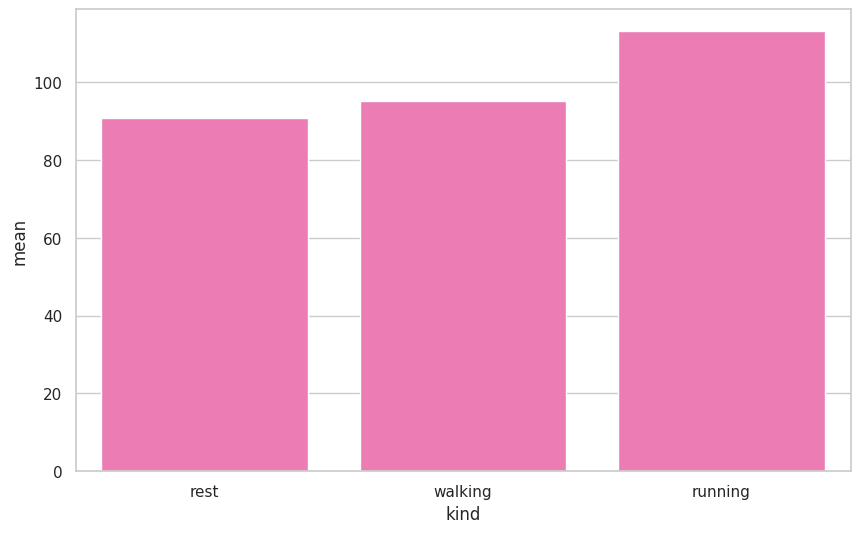

In [24]:
pink_palette = sns.color_palette(["#ff69b4", "#ff1493", "#ffb6c1", "#ffc0cb", "#f08080"])
sns.set(style="whitegrid") 
sns.set_palette(pink_palette)

plt.figure(figsize=(10,6))
dadus = exercise.groupby('kind')['pulse'].agg(['mean','median','std'])
sns.barplot(dadus, x='kind', y='mean')

<Axes: xlabel='pulse', ylabel='Count'>

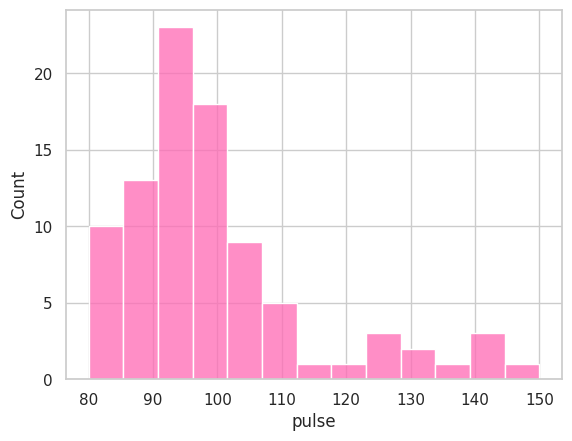

In [17]:
sns.histplot(exercise, x='pulse')

### 2.2. Qual é a distribuição dos tipos de dieta entre os indivíduos?

<Axes: xlabel='diet', ylabel='count'>

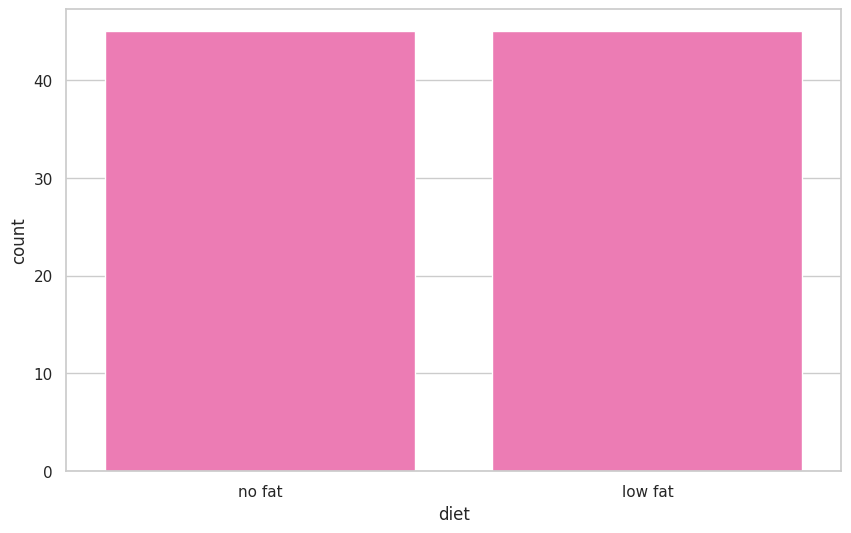

In [39]:
plt.figure(figsize=(10,6))

diet_counts = exercise['diet'].value_counts().reset_index()
diet_counts.columns = ['diet', 'count']
sns.barplot(x='diet', y='count', data=diet_counts)


### 2.3. Quais são os tipos mais comuns de exercício realizados pelas pessoas no estudo?

<Axes: xlabel='kind', ylabel='count'>

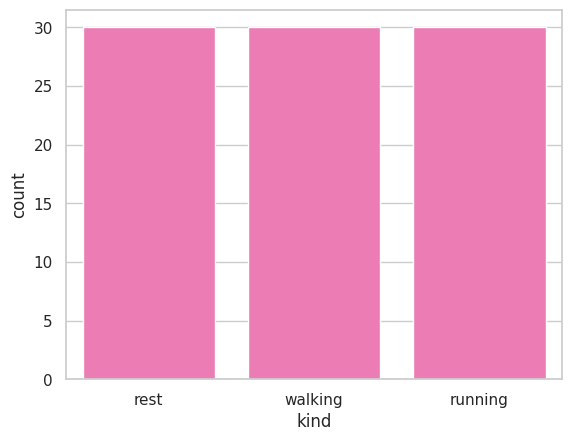

In [40]:
sns.countplot(x='kind', data=exercise)

### 2.4. Como os batimentos cardíacos (pulse) variam em relação ao tipo de dieta?

<Axes: xlabel='diet', ylabel='pulse'>

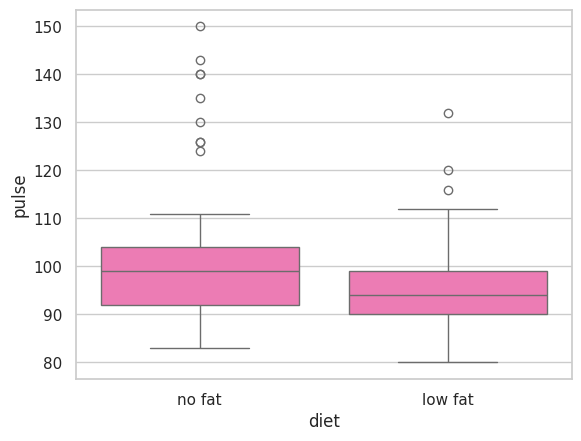

In [42]:
sns.boxplot(x='diet',y='pulse', data=exercise)

<Axes: xlabel='diet', ylabel='pulse'>

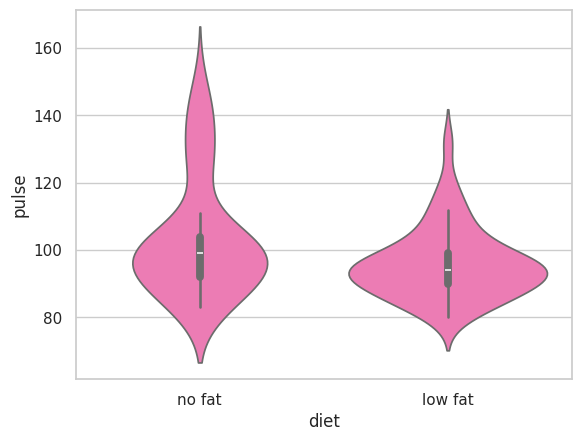

In [44]:
sns.violinplot(x='diet',y='pulse', data=exercise)

### 2.5. Como os batimentos cardíacos (pulse) variam em relação ao tipo de exercício?

<Axes: xlabel='kind', ylabel='pulse'>

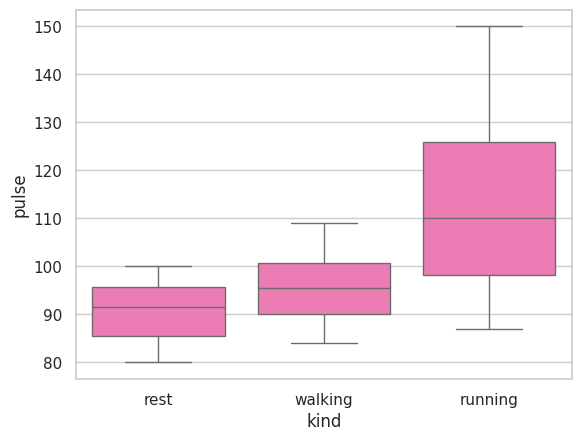

In [43]:
sns.boxplot(x='kind',y='pulse',data=exercise)

<Axes: xlabel='kind', ylabel='pulse'>

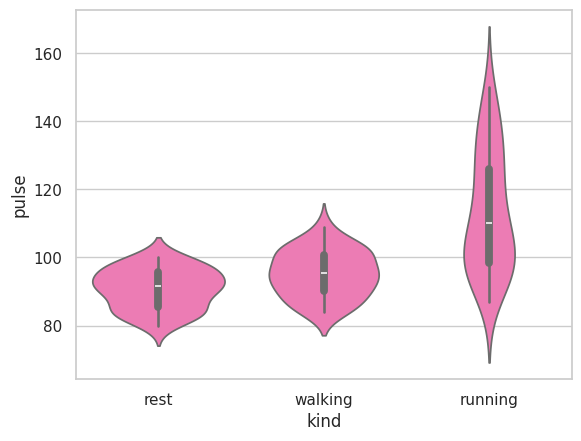

In [45]:
sns.violinplot(x='kind',y='pulse',data=exercise)

### 2.6. Há alguma associação entre o tempo de exercício e os batimentos cardíacos?

<Axes: xlabel='time', ylabel='pulse'>

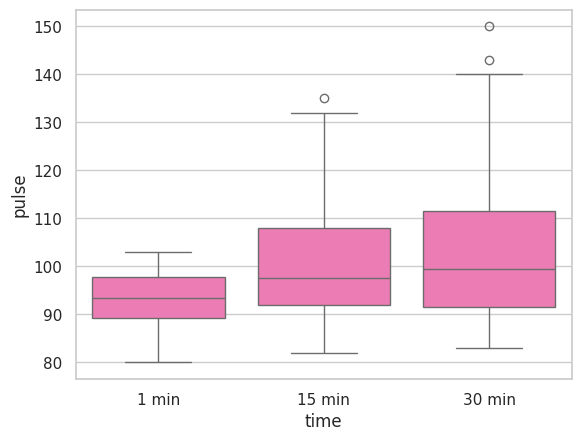

In [46]:
sns.boxplot(x='time',y='pulse',data=exercise)

<Axes: xlabel='time', ylabel='pulse'>

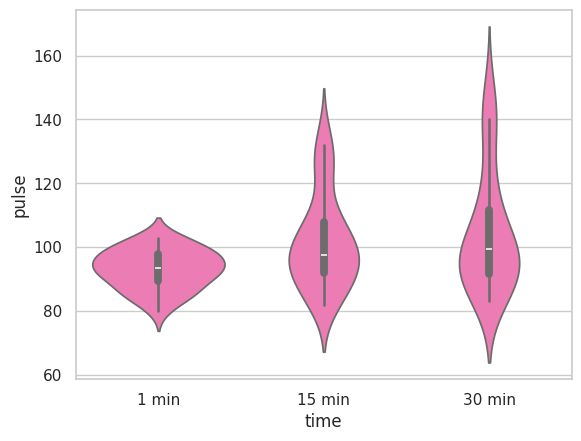

In [47]:
sns.violinplot(x='time',y='pulse',data=exercise)

## 3. Insights

Ao analisar os gráficos, observamos:

    Ausência de valores nulos no dataset, o que elimina a necessidade de qualquer tipo de pré-processamento para imputação de valores nulos ou perda de amostras, garantindo assim dados mais confiáveis.
    
    Não há discrepância na distribuição do tipo de dieta entre os indivíduos, indicando uma amostra balanceada.
    
    Não há diferenças significativas nos tipos de exercícios praticados pelos participantes, uma vez que todos foram submetidos ao mesmo protocolo de exercícios, resultando em uma distribuição semelhante.
    
    Indivíduos com dietas de baixo teor de gordura tendem a ter batimentos cardíacos concentrados entre 90 e 100 batimentos por minuto, enquanto aqueles com dietas sem gordura apresentam frequências mais elevadas, indicando uma distribuição mais dispersa e a presença de outliers.
    
    Durante a atividade de corrida, os participantes alcançaram frequências cardíacas mais altas em comparação com os exercícios de caminhada e repouso.
    
    Existe uma aparente relação entre o tempo de exercício e os batimentos cardíacos dos participantes, com uma notável acentuação, além da presença de outliers.